使用分詞工具 斷詞

In [1]:
import os
import requests

In [2]:
import jieba.analyse
import urllib

url = "https://raw.githubusercontent.com/cjwu/cjwu.github.io/master/courses/nlp/hw1-dataset.txt"
text = urllib.request.urlopen(url).read().decode("utf-8")
result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\iwin4\AppData\Local\Temp\jieba.cache
Loading model cost 0.845 seconds.
Prefix dict has been built successfully.


In [3]:
#輸出
print("Top 100 High TF-IDF Words:")
for i in result:
    print('word:', i[0], 'TF-IDF:', i[1])

Top 100 High TF-IDF Words:
word: 什麼 TF-IDF: 0.19464509600157406
word: 八卦 TF-IDF: 0.19420501140555646
word: 台灣 TF-IDF: 0.12081408131496592
word: 怎麼 TF-IDF: 0.11186701189176337
word: 肥宅 TF-IDF: 0.07336596927026089
word: 現在 TF-IDF: 0.03800903805058438
word: 不會 TF-IDF: 0.036229733848907944
word: 還是 TF-IDF: 0.03568381096884812
word: 是不是 TF-IDF: 0.0355764318510935
word: 一個 TF-IDF: 0.03550183667549485
word: 中國 TF-IDF: 0.034474018907481
word: 這樣 TF-IDF: 0.0325902479818425
word: 怎樣 TF-IDF: 0.029860633581543415
word: 時候 TF-IDF: 0.02967528939386879
word: 一樣 TF-IDF: 0.028691280252032575
word: 真的 TF-IDF: 0.026822655692091746
word: 沒有 TF-IDF: 0.026099831518909124
word: ... TF-IDF: 0.02543259244328046
word: 應該 TF-IDF: 0.02359936993246231
word: 可以 TF-IDF: 0.022958278161416924
word: 喜歡 TF-IDF: 0.02285462328744244
word: 因為 TF-IDF: 0.022416537025666042
word: 一堆 TF-IDF: 0.021680457381807062
word: 問題 TF-IDF: 0.020815837223021518
word: 感覺 TF-IDF: 0.020714740393380813
word: 哪個 TF-IDF: 0.020643972612632316
wo

統計前一百個高頻和TF-IDF權重高

In [4]:
import jieba.analyse
tags = jieba.analyse.extract_tags(text, topK=5, withWeight=True)

for tag in tags:
    print('word:', tag[0], 'tf-idf:', tag[1])

word: 什麼 tf-idf: 0.19464509600157406
word: 八卦 tf-idf: 0.19420501140555646
word: 台灣 tf-idf: 0.12081408131496592
word: 怎麼 tf-idf: 0.11186701189176337
word: 肥宅 tf-idf: 0.07336596927026089


計算並畫出其統計圖型

fig #1

       term    weight  word_index
0       的八卦  0.001379           1
1       有沒有  0.001273           2
2      沒有資料  0.000736           3
3       認真回  0.000561           4
4        vs  0.000547           5
..      ...       ...         ...
95      為什麼  0.000112          96
96       對了  0.000111          97
97  pokemon  0.000111          98
98       無聊  0.000110          99
99      嗆三小  0.000109         100

[100 rows x 3 columns]
100


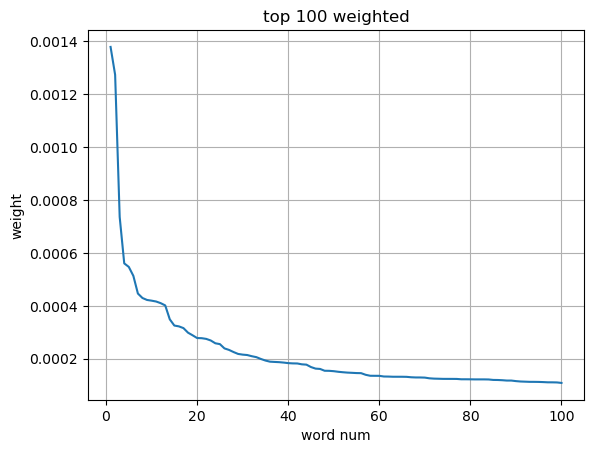

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


docs = text.split('\n') # 一行一個文章

# TF-IDF
vectorizer = TfidfVectorizer() 
X_axes = vectorizer.fit_transform(docs) 

weights = np.asarray(X_axes.mean(axis=0)).ravel().tolist() # cauculate the weight


#x軸:字詞編號;y軸:權重 
# build DataFrame
df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'weight': weights})

# sort
df = df.sort_values(by='weight', ascending=False)

# index
df = df.reset_index(drop=True)
df['word_index'] = df.index + 1

# 輸出
top_100_1 = df.head(100)
print(top_100_1)

# 繪製折線圖
weights = top_100_1['weight'].values
print(len(weights))
word_index = top_100_1['word_index'].values

# 繪製摺線圖

# plt.figure(figsize=(10, 6))
plt.plot(word_index, weights)
plt.xlabel('word num')
plt.ylabel('weight')
plt.title('top 100 weighted')
plt.grid(True)
plt.show()

fig #2

fig #3

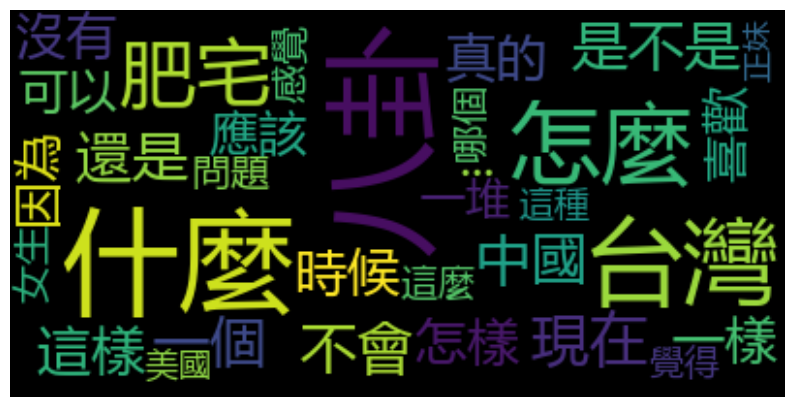

In [9]:
from wordcloud import WordCloud
import jieba.analyse
import matplotlib.pyplot as plt

result = jieba.analyse.extract_tags(text, topK=100, withWeight=True)

# 32 words
result = result[:32]

# transger DataFrame to dict
dict_data = top_100_1.set_index('term')['weight'].to_dict()

# transfer words and weighted dict
words_dict = dict(result)

# WordCloud obj
wc = WordCloud(font_path='msyh.ttc')

# 將 dictionary 中的詞彙及權重傳給 WordCloud 物件
wc.generate_from_frequencies(words_dict)

# 繪製文字雲
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()